In [1]:
import mne
import os

# Reduce logging noise so you see fewer download/loading messages
mne.set_log_level('WARNING')


In [2]:
# Get the path to the MNE sample dataset.
# This will download the dataset if not already on your system.
data_path = mne.datasets.sample.data_path()

# Define the path to the specific raw data file
sample_data_folder = os.path.join(data_path, 'MEG', 'sample')
sample_data_raw_file = os.path.join(sample_data_folder, 'sample_audvis_filt-0-40_raw.fif')

print(f"Loading data from: {sample_data_raw_file}")

# Load the raw data into memory
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)

print("\n--- Raw EEG object loaded successfully! ---")
print(raw)


Loading data from: C:\Users\Hp\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif

--- Raw EEG object loaded successfully! ---
<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.8 MiB, data loaded>


In [3]:
# Pick only EEG channels; exclude bad channels
raw.pick_types(meg=False, eeg=True, eog=False, stim=False, exclude='bads')

# Print summary info of EEG-only data
print(raw)

<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 41700 (277.7 s), ~21.7 MiB, data loaded>


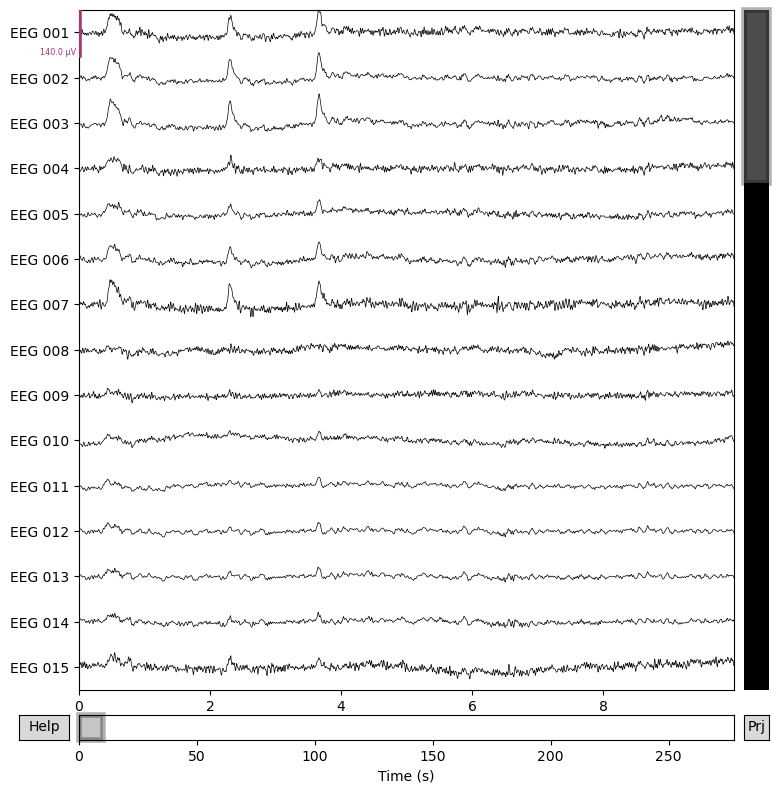

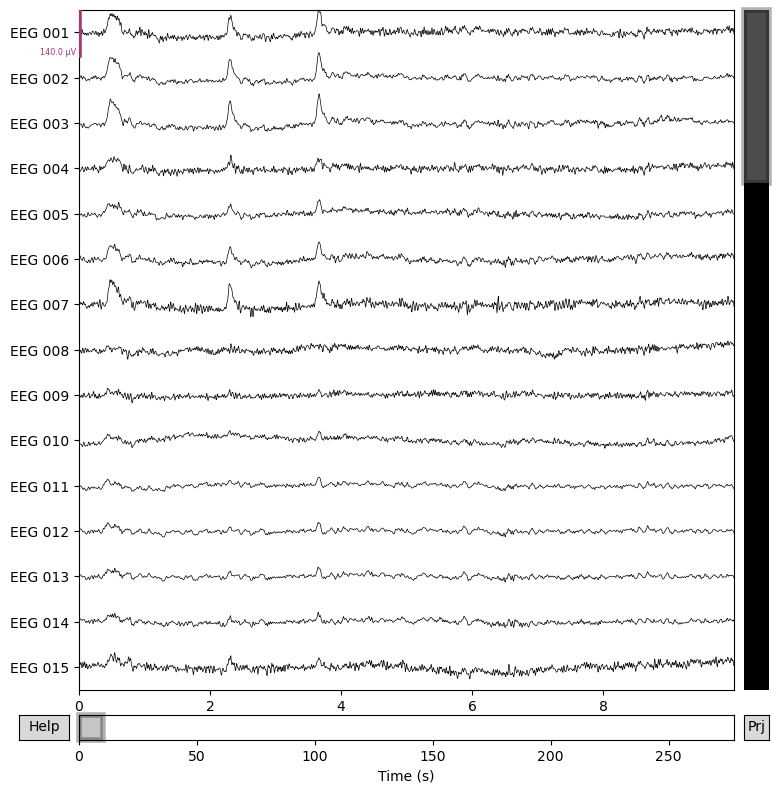

In [4]:
raw.plot(n_channels=15, scalings={'eeg': 70e-6}, title='Raw EEG Data', show_options=True)


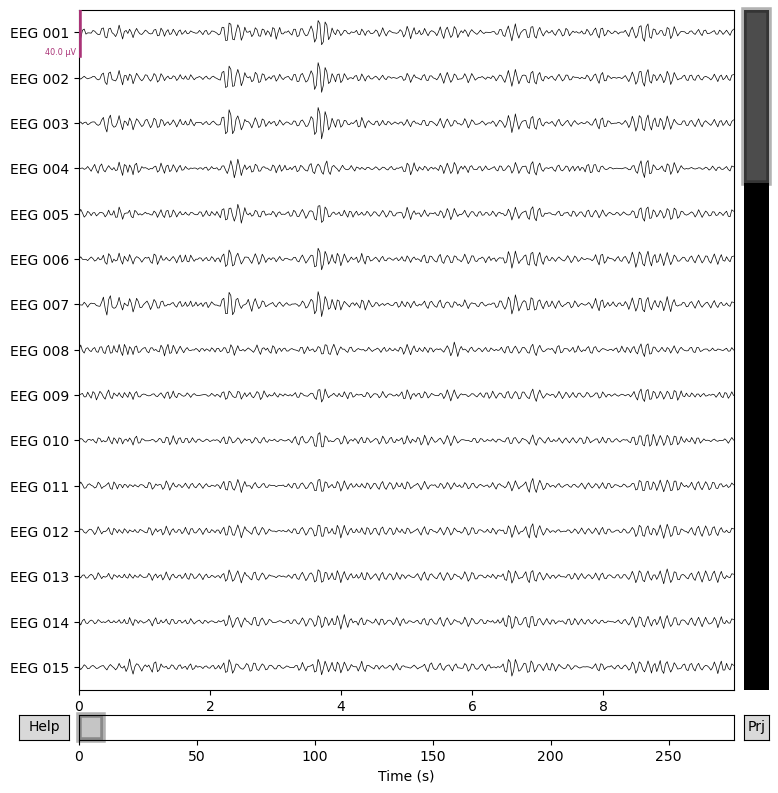

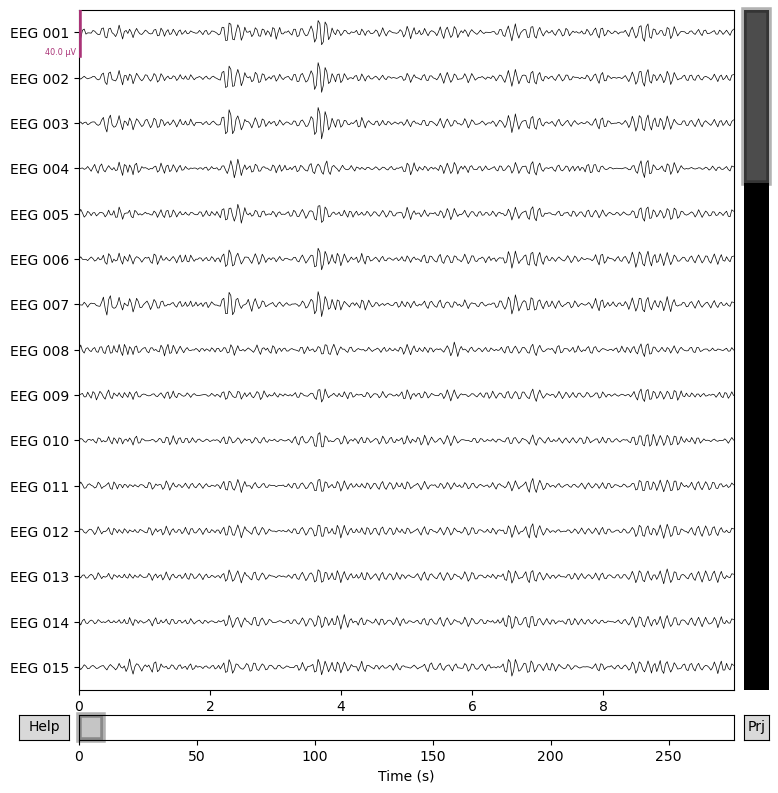

In [5]:
# Apply a bandpass filter to isolate alpha waves (8-12 Hz)
alpha_raw = raw.copy().filter(l_freq=8., h_freq=12.)

# Plot filtered alpha waves
alpha_raw.plot(n_channels=15, scalings={'eeg': 20e-6}, title='Alpha Band (8-12 Hz) EEG', show_options=True)


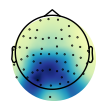

(<matplotlib.image.AxesImage at 0x1dd20e41a90>, None)

In [6]:
# Compute alpha band power
psd = alpha_raw.compute_psd(fmin=8, fmax=12, method='welch', n_fft=2048)

# Get average alpha power per channel
mean_alpha_power = psd.get_data().mean(axis=1)

# Plot topographic map of alpha power
mne.viz.plot_topomap(mean_alpha_power, psd.info, cmap='YlGnBu', contours=0)


In [7]:
import matplotlib.pyplot as plt

# Create figure and axis to plot into
fig, ax = plt.subplots()

# Plot the topomap of alpha power into the axis
mne.viz.plot_topomap(mean_alpha_power, psd.info, cmap='YlGnBu', contours=0, axes=ax, show=False)

# Save as a high-resolution PNG
fig.savefig("alpha_topomap.png", dpi=300, bbox_inches='tight')

plt.close(fig)  # Closes the plot to avoid showing it twice
print("Topomap saved as alpha_topomap.png ✅")


Topomap saved as alpha_topomap.png ✅


In [12]:
import mne
print(mne.__version__)


1.10.0


In [13]:
import matplotlib.pyplot as plt
import mne

# Compute PSD for alpha band (8–12 Hz)
psd = raw.compute_psd(fmin=8, fmax=12)

# Convert to dB and average over frequencies
alpha_power = 10 * np.log10(psd.get_data()).mean(axis=1)

# Plot the alpha topomap
fig, ax = plt.subplots()
mne.viz.plot_topomap(alpha_power, raw.info, axes=ax, show=True)
fig.suptitle("Topographic Map of Alpha Band Power (8–12 Hz)", fontsize=14)

# Save the figure
fig.savefig("alpha_topomap.png", dpi=300, bbox_inches='tight')


NameError: name 'np' is not defined

In [14]:
import numpy as np



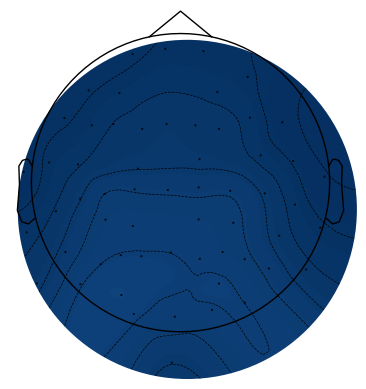

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Compute PSD for alpha band (8–12 Hz)
psd = raw.compute_psd(fmin=8, fmax=12)

# Convert to dB and average over frequencies
alpha_power = 10 * np.log10(psd.get_data()).mean(axis=1)

# Plot the alpha topomap
fig, ax = plt.subplots()
mne.viz.plot_topomap(alpha_power, raw.info, axes=ax, show=True)
fig.suptitle("Topographic Map of Alpha Band Power (8–12 Hz)", fontsize=14)

# Save the figure
fig.savefig("alpha_topomap.png", dpi=300, bbox_inches='tight')


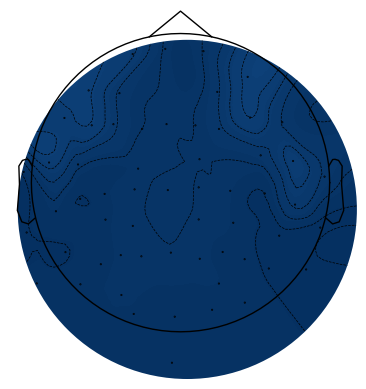

In [16]:
# Compute PSD for beta band (13–30 Hz)
psd_beta = raw.compute_psd(fmin=13, fmax=30)

# Convert to dB and average over frequencies
beta_power = 10 * np.log10(psd_beta.get_data()).mean(axis=1)

# Plot the beta topomap
fig, ax = plt.subplots()
mne.viz.plot_topomap(beta_power, raw.info, axes=ax, show=True)
fig.suptitle("Topographic Map of Beta Band Power (13–30 Hz)", fontsize=14)

# Save the figure
fig.savefig("beta_topomap.png", dpi=300, bbox_inches='tight')


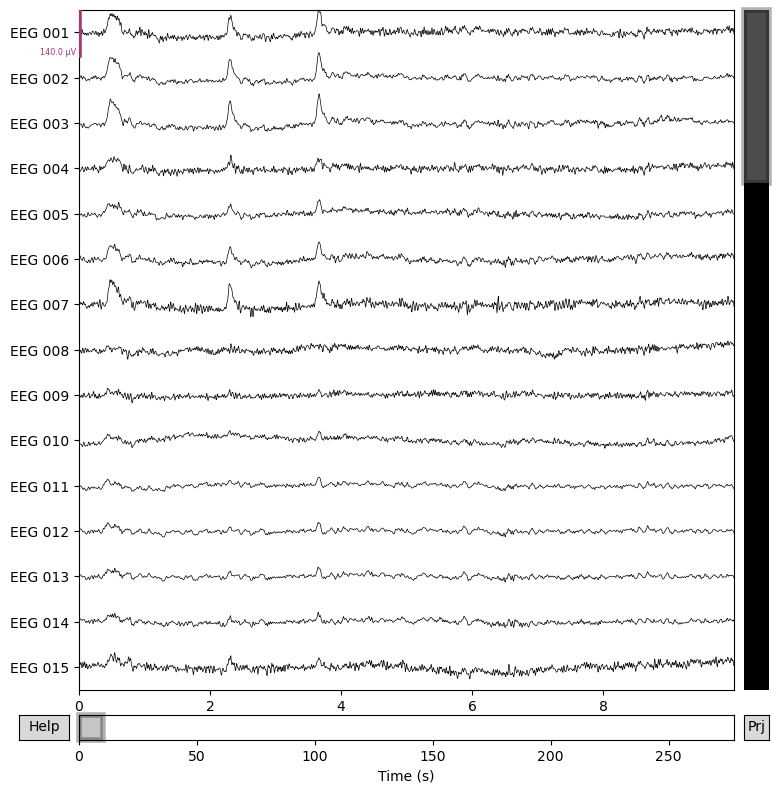

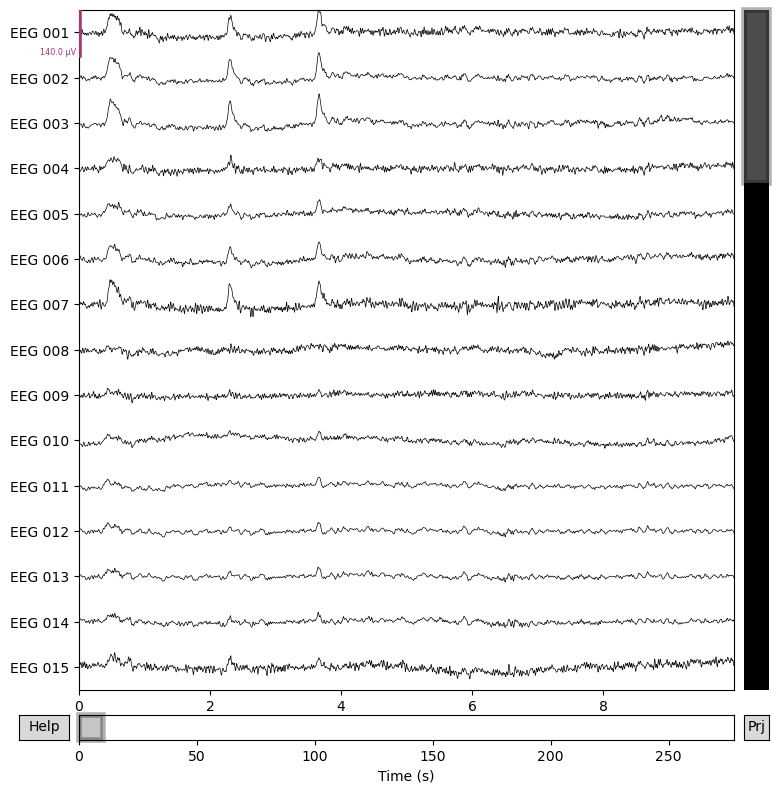

In [17]:
raw.plot(n_channels=15, scalings={'eeg': 70e-6}, title='Raw EEG Data (Before Cleaning)')


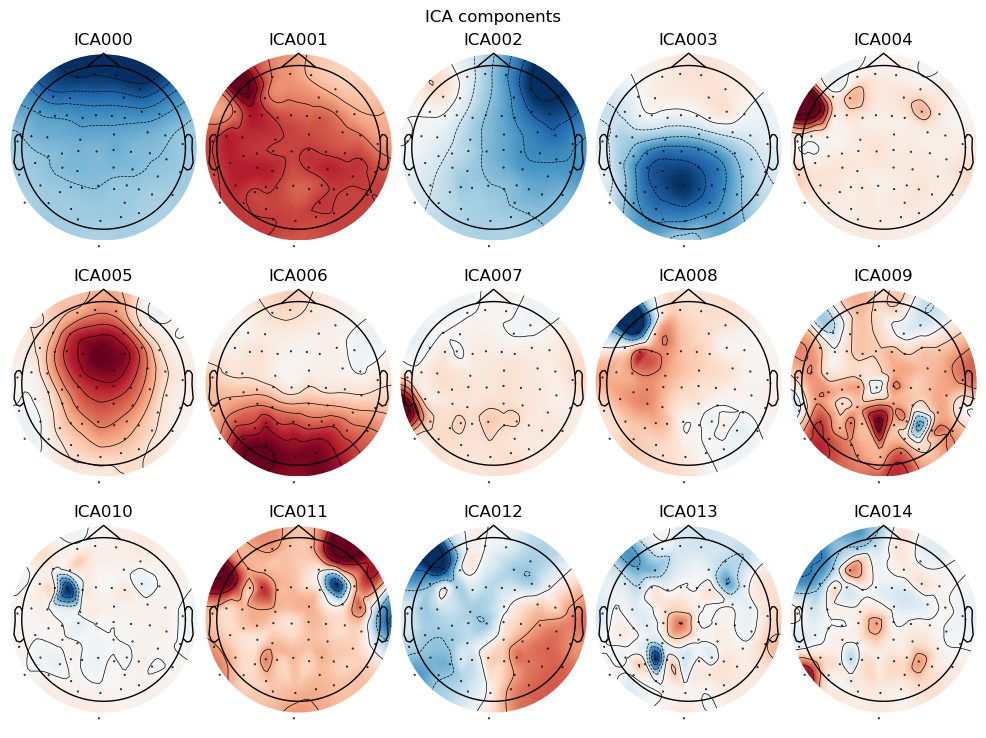

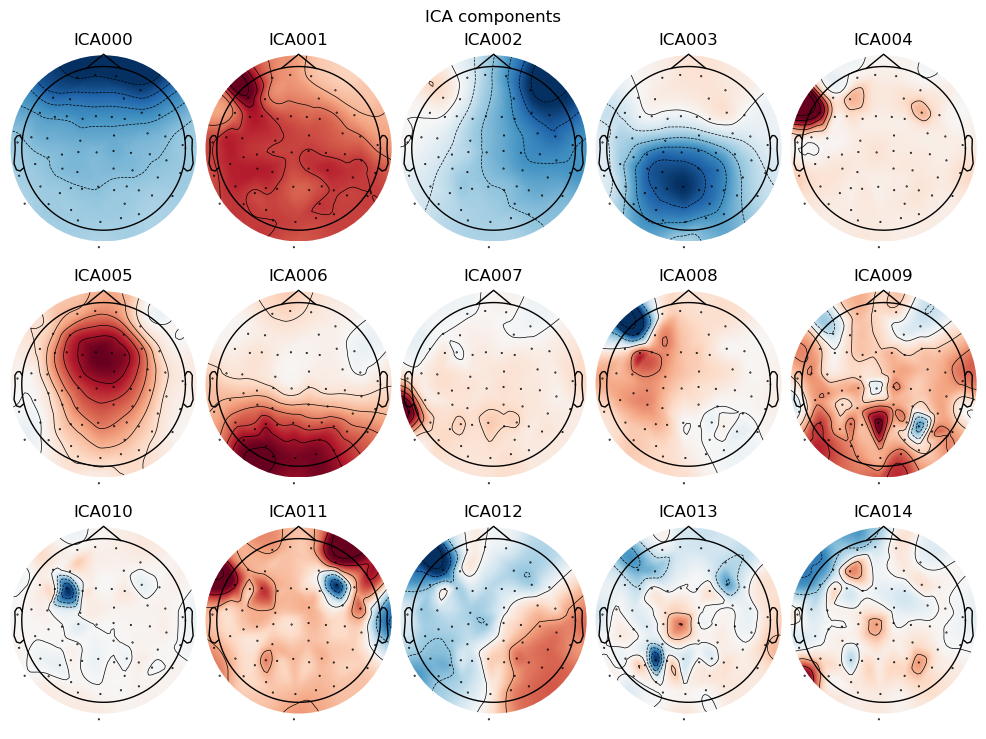

In [20]:
ica = mne.preprocessing.ICA(n_components=15, random_state=97)
ica.fit(raw)


ica.plot_components()


In [21]:
# Exclude eye-blink component (001)
ica.exclude = [1]  # If you want to try both: [1, 5]

# Apply ICA cleaning
raw_clean = raw.copy()
ica.apply(raw_clean)


<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 41700 (277.7 s), ~21.7 MiB, data loaded>

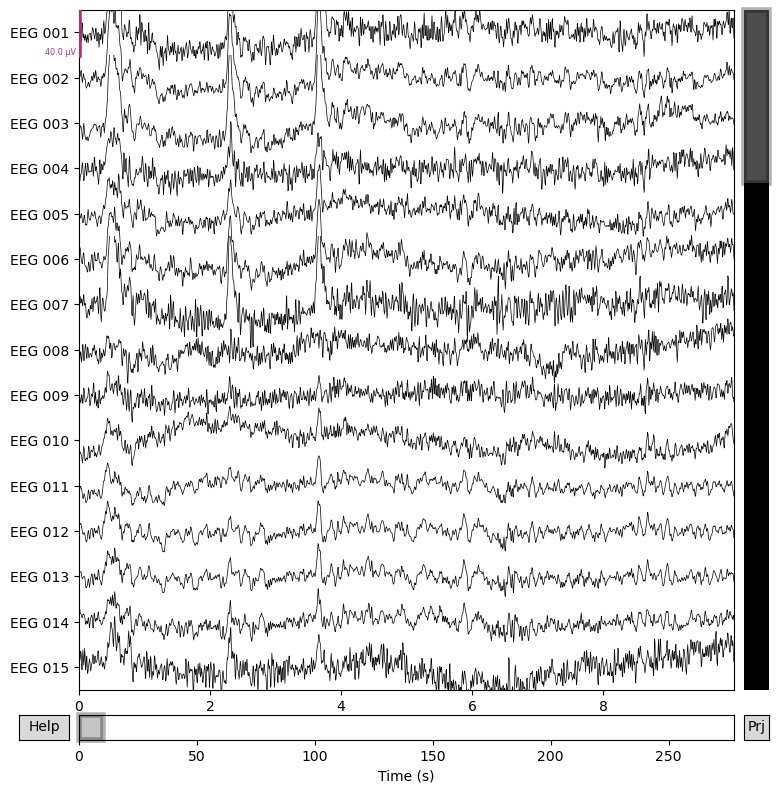

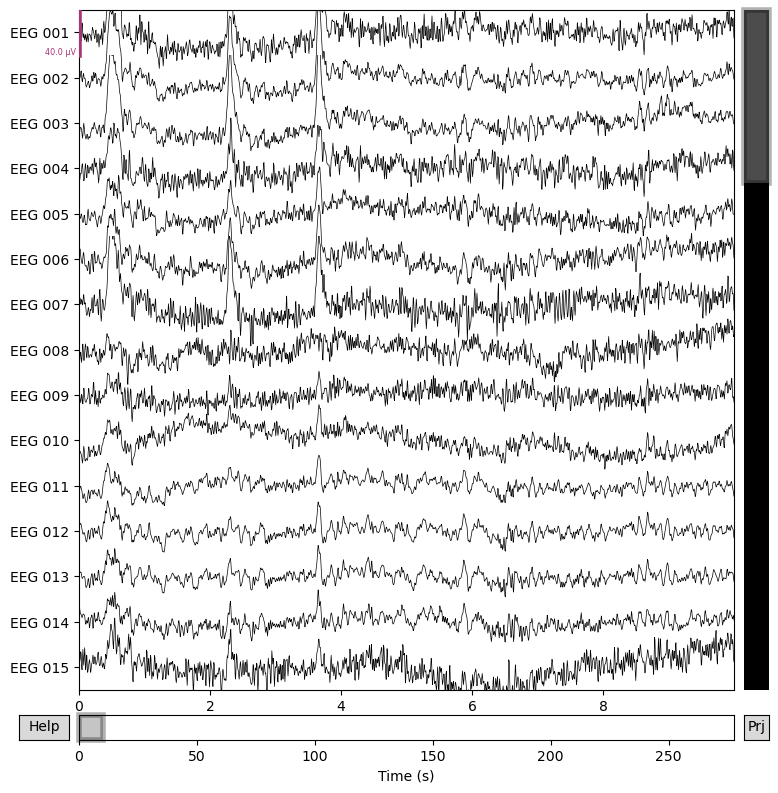

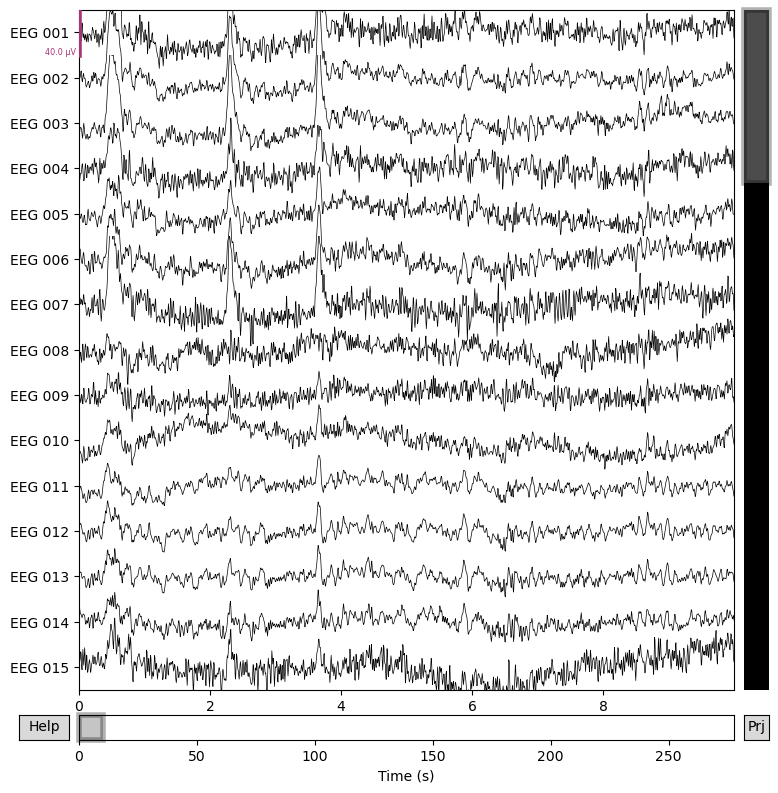

In [22]:
# Before ICA cleaning
raw.plot(n_channels=15, title='Before ICA Cleaning')

# After ICA cleaning
raw_clean.plot(n_channels=15, title='After ICA Cleaning')


In [23]:
import os
os.getcwd()


'C:\\Users\\Hp'